In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

dfpop = pd.read_csv('/kaggle/input/number-of-deaths-from-tobacco-smoking/crescimento populacional.csv')
dfmortes = pd.read_csv('/kaggle/input/number-of-deaths-from-tobacco-smoking/number-of-deaths-from-tobacco-smoking.csv')
dfmortalidade = pd.read_csv('/kaggle/input/number-of-deaths-from-tobacco-smoking/death-rate-smoking.csv')
# Só os BR interessam.
dfmortes = dfmortes[dfmortes['Entity'] == 'Brazil']
dfmortes = dfmortes.rename(columns = {'Entity':'País', 'Code':'Sigla', 'Year':'Ano',
    'Deaths that are from all causes attributed to smoking, in both sexes aged all ages':'Mortes'})
dfmortalidade = dfmortalidade[dfmortalidade['Entity'] == 'Brazil']
dfmortalidade = dfmortalidade.rename(columns = {'Entity':'País', 'Code':'Sigla', 'Year':'Ano',
    'Deaths that are from all causes attributed to smoking per 100,000 people, in both sexes aged age-standardized':'Mortalidade'})

# Eliminar colunas (e linha) desnecessárias
dfpop.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
dfmortes = dfmortes.drop(columns=['País', 'Sigla'])
dfmortalidade = dfmortalidade.drop(columns=['País', 'Sigla'])

dfpop = dfpop[dfpop['Country Name'] == 'Brazil']
dfpop = dfpop.rename(columns = {'Country Name':'País'})

# Melt nesse dataset pois os anos eram colunas. 
# Assim há uma coluna anos e uma coluna população.
dfpop = pd.melt(dfpop, id_vars=['País'], var_name='Ano', value_name='População')
dfpop.sort_values(by='Ano', inplace=True)
dfpop.reset_index(drop=True, inplace=True)
dfpop = dfpop.dropna()

# Apenas anos de 1990 em diante, para bater com os dfs anteriores
dfpop['Ano'] = pd.to_numeric(dfpop['Ano'], errors='coerce')
dfpop = dfpop[(dfpop['Ano'] >= 1990) & (dfpop['Ano'] <= 2019)]

df = pd.DataFrame(columns=['Ano', 'Mortes','Mortalidade','População'])
df['Ano'] = dfpop['Ano'].reset_index(drop=True)
df['População'] = dfpop['População'].reset_index(drop=True)
df['Mortes'] = dfmortes['Mortes'].reset_index(drop=True)
df['Mortalidade'] = dfmortalidade['Mortalidade'].reset_index(drop=True)

In [2]:
df.head()

,Ano,Mortes,Mortalidade,População
0,1990,150020.47,179.83685,150706446.0
1,1991,148883.73,172.33006,153336445.0
2,1992,151624.40,169.29024,155900790.0
3,1993,157890.23,170.22383,158440875.0
4,1994,159255.53,165.71918,160980472.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/710070237.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(val/1000)} mil' for val in ticks_loc])


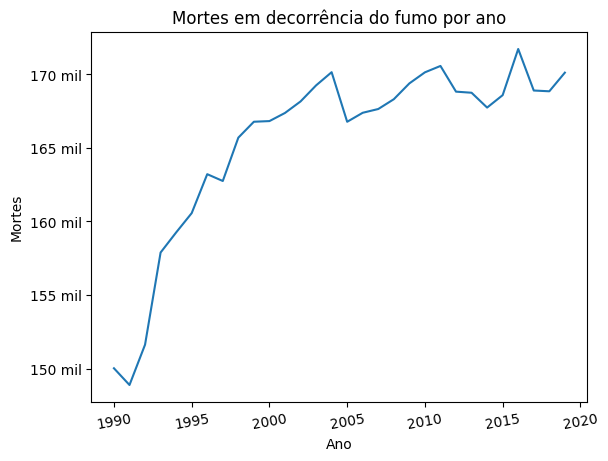

In [3]:
ax = sns.lineplot(data=df, x='Ano', y='Mortes')
plt.xlabel('Ano')
plt.ylabel('Mortes')
plt.title('Mortes em decorrência do fumo por ano')
plt.xticks(rotation=10)
ticks_loc = ax.get_yticks().tolist()
ax.set_yticklabels([f'{int(val/1000)} mil' for val in ticks_loc])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/1222929818.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(val/1000000)} milhões' for val in ticks_loc])


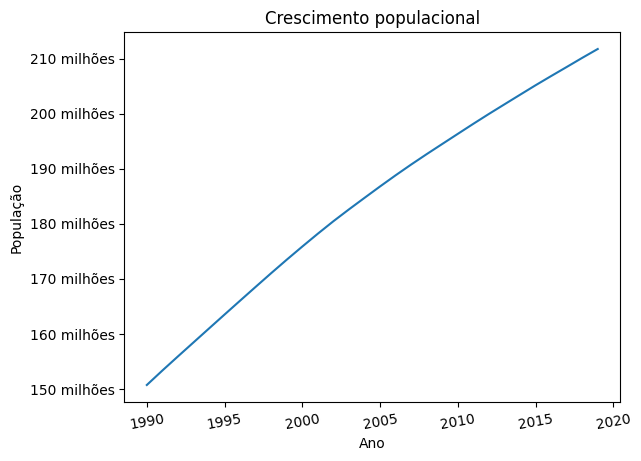

In [4]:
ax = sns.lineplot(data=df, x='Ano', y='População')
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Crescimento populacional')
plt.xticks(rotation=10)
ticks_loc = ax.get_yticks().tolist()
ax.set_yticklabels([f'{int(val/1000000)} milhões' for val in ticks_loc])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


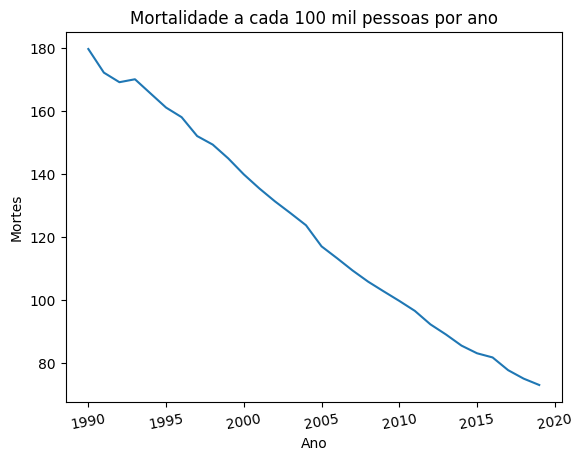

In [5]:
ax = sns.lineplot(data=df, x='Ano', y='Mortalidade')
plt.xlabel('Ano')
plt.ylabel('Mortes')
plt.title('Mortalidade a cada 100 mil pessoas por ano')
plt.xticks(rotation=10)

plt.show()